202007A bloom timing

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [5]:
def get_the_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [9]:
def get_sockeye_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}02*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}03*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [4]:
def get_the_data_H201812(year):
    evenlessink = []
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [6]:
directory = '202007A'
timeseries2015 = get_the_data('2015')

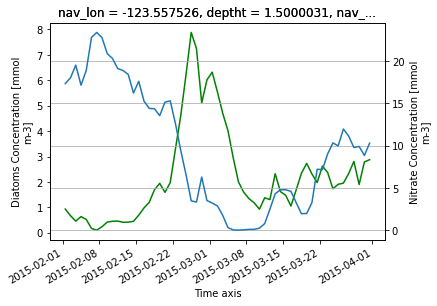

In [7]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2015.nitrate.plot(ax=ax2);
ax2.grid()

In [16]:
print(timeseries2015.diatoms[22:27])
print(timeseries2015.time_counter[24])

<xarray.DataArray 'diatoms' (time_counter: 5)>
array([4.598426 , 6.208214 , 7.8824215, 7.247807 , 5.109274 ],
      dtype=float32)
Coordinates:
    nav_lon        float32 -123.557526
    deptht         float32 1.5000031
    nav_lat        float32 49.127777
    time_centered  (time_counter) datetime64[ns] 2015-02-23T12:00:00 ... 2015-02-27T12:00:00
  * time_counter   (time_counter) datetime64[ns] 2015-02-23T12:00:00 ... 2015-02-27T12:00:00
Attributes:
    standard_name:       mole_concentration_of_diatoms_expressed_as_nitrogen_...
    long_name:           Diatoms Concentration
    units:               mmol m-3
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area
<xarray.DataArray 'time_counter' ()>
array('2015-02-25T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    nav_lon        float32 -123.557526
    deptht         float32 1.5000031
    nav_lat  

In [10]:
directory = 'ESS_2018_LF'
old2015 = get_sockeye_data('2015')

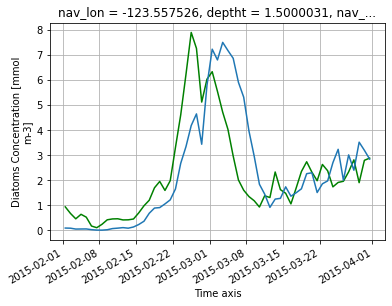

In [11]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()

In [17]:
df1 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df2 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df3 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

In [19]:
df4 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df5 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df6 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

In [22]:
df = pd.concat([df1.drop(df1[df1.TimeUTC<'2015'].index),
                df2.drop(df2[df2.TimeUTC>'2018'].index),
                df3.drop(df3[df3.TimeUTC>'2018'].index),
                df4.drop(df4[df4.TimeUTC>'2018'].index),
                df5.drop(df5[df5.TimeUTC>'2018'].index),
                df6.drop(df6[df6.TimeUTC>'2018'].index),
               ], ignore_index=True)

In [23]:
dts = [dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df = df.assign(dts=dts)
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')

In [24]:
llon = places.PLACES['S3']['lon lat'][0] - .01
ulon = places.PLACES['S3']['lon lat'][0] + .01
llat = places.PLACES['S3']['lon lat'][1] - .01
ulat = places.PLACES['S3']['lon lat'][1] + .01
iidfnd = (df.Lon > llon) & (df.Lon < ulon) & (df.Lat > llat) & (df.Lat < ulat)

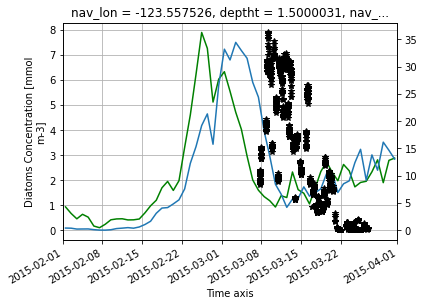

In [25]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2015, 2, 1),dt.datetime(2015, 4, 1)));

## 2016 and 2017 not run yet

In [19]:
directory = 'ESS_2018_LF'
timeseries2016 = get_sockeye_data('2016')

In [20]:
directory = 'ESS_2018'
old2016 = get_the_data('2016')

In [ ]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
old2016.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax2.set_ylim(0, 15)
ax.set_xlim((dt.datetime(2016, 3, 15),dt.datetime(2016, 4, 1)));

In [14]:
directory = 'ESS_2018_LF'
timeseries2017 = get_sockeye_data('2017')

In [15]:
directory = 'ESS_2018'
old2017 = get_the_data('2017')

In [ ]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2017, 3, 1),dt.datetime(2017, 4, 30)));